# Exploratory Data Analysis, Original Features

In [11]:
import numpy as np
import pandas as pd
import datetime
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)

from itertools import cycle
from collections import Counter

import plotly.plotly as py
import plotly.graph_objs as go

In [12]:
#available here: https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis

### Various dataframes:

In [21]:
train_provider_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/data_out/train_provider_data.csv', low_memory=False)   
train_bene_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/data_out/train_bene_data.csv', low_memory=False)   
train_inp_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/data_out/train_inp_data.csv', low_memory=False)    
train_outp_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/data_out/train_outp_data.csv', low_memory=False)  
train_all_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/data_out/train_all_df.csv', low_memory=False)

In [22]:
train_provider_data.head()

,Provider,PotentialFraud
0,51001,No
1,51003,Yes
2,51004,No
3,51005,Yes
4,51007,No


In [23]:
train_bene_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Death,Age
0,11001,1943-01-01,NaN,0,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,67.0
1,11002,1936-09-01,NaN,1,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,0,73.0
2,11003,1936-08-01,NaN,0,1,0,52,590,12,12,1,0,0,0,0,0,0,1,0,0,0,0,0,90,40,0,73.0
3,11004,1922-07-01,NaN,0,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,0,87.0
4,11005,1935-09-01,NaN,0,1,0,24,680,12,12,0,0,0,0,1,0,1,0,0,0,0,0,0,1790,1200,0,74.0


In [24]:
train_inp_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,In_Out,Duration
0,11001,46614,2009-04-12,2009-04-18,55912,26000,390922.0,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,1,6
1,11001,66048,2009-08-31,2009-09-02,55907,5000,318495.0,318495.0,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,1,2
2,11001,68358,2009-09-17,2009-09-20,56046,5000,372395.0,NaN,324689.0,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3
3,11011,38412,2009-02-14,2009-02-22,52405,5000,369659.0,392961.0,349768.0,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,1,8
4,11014,63689,2009-08-13,2009-08-30,56614,10000,379376.0,398258.0,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,1,17


In [25]:
train_outp_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode,In_Out
0,11002,624349,2009-10-11,2009-10-11,56011,30,326117.0,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,0
1,11003,189947,2009-02-12,2009-02-12,57610,80,362868.0,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,0
2,11003,438021,2009-06-27,2009-06-27,57595,10,328821.0,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,11004,121801,2009-01-06,2009-01-06,56011,40,334319.0,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,11004,150998,2009-01-22,2009-01-22,56011,200,403831.0,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,0


In [26]:
train_all_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode,In_Out,AdmissionDt,DischargeDt,DiagnosisGroupCode,Duration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Death,Age,PotentialFraud
0,11002,624349,2009-10-11,2009-10-11,56011,30,326117.0,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,0,NaN,NaN,NaN,NaN,1936-09-01,NaN,1,1,0,39,280,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,30,50,0,73.0,Yes
1,11004,121801,2009-01-06,2009-01-06,56011,40,334319.0,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN,1922-07-01,NaN,0,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,0,87.0,Yes
2,11004,150998,2009-01-22,2009-01-22,56011,200,403831.0,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947,0,NaN,NaN,NaN,NaN,1922-07-01,NaN,0,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,0,87.0,Yes
3,11004,173224,2009-02-03,2009-02-03,56011,20,339887.0,NaN,NaN,20381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN,1922-07-01,NaN,0,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,0,87.0,Yes
4,11004,224741,2009-03-03,2009-03-03,56011,40,345721.0,NaN,NaN,V6546,4280,2449,V854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,NaN,NaN,1922-07-01,NaN,0,1,0,39,270,12,12,1,1,0,0,0,0,1,1,1,1,0,0,0,1810,760,0,87.0,Yes


In [19]:
def col_info(df):
    collist = df.columns
    dtypes = []
    perc_nan = []
    unique_vals = []
    for i in collist:
        dtypes.append(df.dtypes[i])
    for i in collist:
        perc_nan.append((df[i].isnull().sum(axis=0))/len(df))
    for i in collist:
        unique_vals.append(len(df[i].unique()))
    info = pd.DataFrame({'facet': collist, 'Dtype': dtypes, 'Perc_nan': perc_nan, 'Unique_vals': unique_vals})
    print(info)           
                  
all_train_frames = [train_provider_data, train_bene_data, train_inp_data, train_outp_data, train_all_data]

for df in all_train_frames:
    col_info(df)

            facet   Dtype  Perc_nan  Unique_vals
0        Provider   int64       0.0         5410
1  PotentialFraud  object       0.0            2
                              facet    Dtype  Perc_nan  Unique_vals
0                            BeneID    int64  0.000000       138556
1                               DOB   object  0.000000          900
2                               DOD   object  0.989744           12
3                            Gender    int64  0.000000            2
4                              Race    int64  0.000000            4
5             RenalDiseaseIndicator    int64  0.000000            2
6                             State    int64  0.000000           52
7                            County    int64  0.000000          314
8               NoOfMonths_PartACov    int64  0.000000           13
9               NoOfMonths_PartBCov    int64  0.000000           13
10            ChronicCond_Alzheimer    int64  0.000000            2
11         ChronicCond_Heartfailure  

### Modifying original dataframes

In [20]:
# to datetime
# TRAIN
train_bene_data['DOB'] = pd.to_datetime(train_bene_data['DOB'])
train_inp_data['ClaimStartDt'] = pd.to_datetime(train_inp_data['ClaimStartDt'])
train_inp_data['ClaimEndDt'] = pd.to_datetime(train_inp_data['ClaimEndDt'])
train_inp_data['AdmissionDt'] = pd.to_datetime(train_inp_data['AdmissionDt'])
train_inp_data['DischargeDt'] = pd.to_datetime(train_inp_data['DischargeDt'])
train_outp_data['ClaimStartDt'] = pd.to_datetime(train_outp_data['ClaimStartDt'])
train_outp_data['ClaimEndDt'] = pd.to_datetime(train_outp_data['ClaimEndDt'])

train_all_data['DOB'] = pd.to_datetime(train_all_data['DOB'])
train_all_data['ClaimStartDt'] = pd.to_datetime(train_all_data['ClaimStartDt'])
train_all_data['ClaimEndDt'] = pd.to_datetime(train_all_data['ClaimEndDt'])
train_all_data['AdmissionDt'] = pd.to_datetime(train_all_data['AdmissionDt'])
train_all_data['DischargeDt'] = pd.to_datetime(train_all_data['DischargeDt'])
train_all_data['ClaimStartDt'] = pd.to_datetime(train_all_data['ClaimStartDt'])
train_all_data['ClaimEndDt'] = pd.to_datetime(train_all_data['ClaimEndDt'])

NameError: name 'test_all_data' is not defined

In [ ]:
train_bene_data.head()

#### Proportionally, there are more potentially fraudulent claims on the claims-level than provider-level.

In [31]:
print(train_provider_data.PotentialFraud.value_counts())
print(train_all_data.PotentialFraud.value_counts())

No     4904
Yes     506
Name: PotentialFraud, dtype: int64
No     345415
Yes    212796
Name: PotentialFraud, dtype: int64


In [34]:
print("Provider Ratio:", 506/(4904+506))
print("Claim Ratio", 212796/(345415+212796))

Provider Ratio: 0.09353049907578559
Claim Ratio 0.3812106891480103


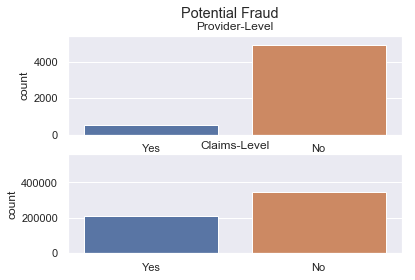

In [257]:
sns.set()

fig, ax = plt.subplots(2, 1)
fig.suptitle('Potential Fraud')
            
zero = sns.countplot(train_provider_data.PotentialFraud.values, order = ["Yes", "No"], ax=ax[0])
ax[0].set_title("Provider-Level") 
zero.set_ylim(0, len(train_provider_data.PotentialFraud.values))

one = sns.countplot(train_all_data.PotentialFraud.values, ax=ax[1])
ax[1].set_title("Claims-Level") 
one.set_ylim(0, len(train_all_data.PotentialFraud.values))
plt.show()


# Checking distributions and outliers from original tables:
## Beneficiary table facets:

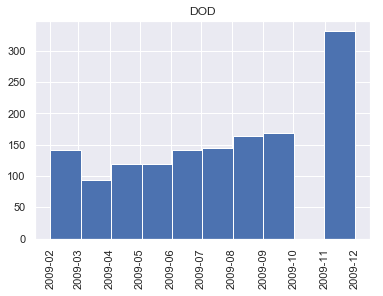

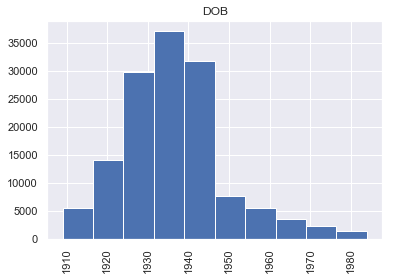

In [479]:
def datetime_hist(df, col):
    sns.set()
    series_ = df[col][(df[col].notnull())]
    series_ = pd.to_datetime(series_)
    g = series_.hist()
    g.tick_params(axis='x', rotation=90)
    g.set_title(col)
    plt.show()
    
datetime_hist(train_bene_data, 'DOD')
datetime_hist(train_bene_data, 'DOB')

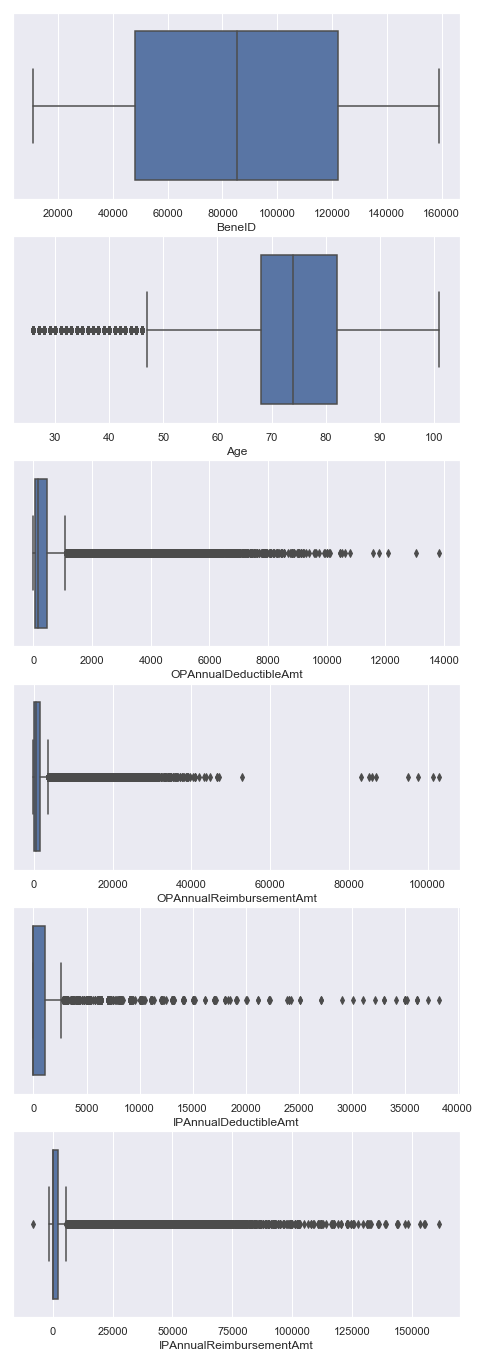

In [481]:
words = {0:'Zero', 1: 'One', 2: 'Two', 3: 'Three', 4: 'Four', 5: 'Five', \
            6: 'Six', 7: 'Seven', 8: 'Eight', 9: 'Nine', 10: 'Ten', \
            11: 'Eleven', 12: 'Twelve', 13: 'Thirteen', 14: 'Fourteen', \
            15: 'Fifteen', 16: 'Sixteen', 17: 'Seventeen', 18: 'Eighteen', 19: 'Nineteen'}

def boxplot_loop(cols, df): 
    nums = list(range(len(cols)))
    tuples = list(zip(cols, nums))
    
    sns.set()
    fig, ax_ = plt.subplots(len(cols), 1, figsize=(8, 4*len(cols)))
    
    for col, i in tuples:
            graph_name = words[i]
            graph_name = sns.boxplot(df[col], ax=ax_[i])
    plt.show()

cols = ['BeneID', 'Age', 'OPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt']

boxplot_loop(cols, train_bene_data)

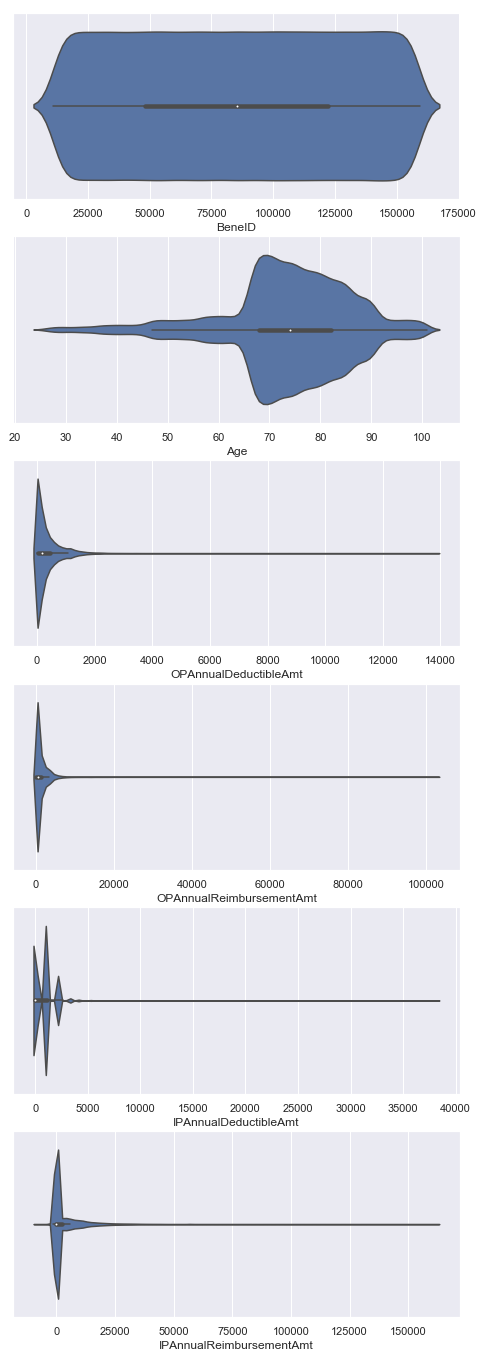

In [483]:
def violinplot_loop(cols, df): 
    nums = list(range(len(cols)))
    tuples = list(zip(cols, nums))
    
    sns.set()
    fig, ax_ = plt.subplots(len(cols), 1, figsize=(8, 4*len(cols)))

    for col, i in tuples:
            graph_name = words[i]
            graph_name = sns.violinplot(df[col], ax=ax_[i])
    plt.show()

violinplot_loop(cols, train_bene_data)

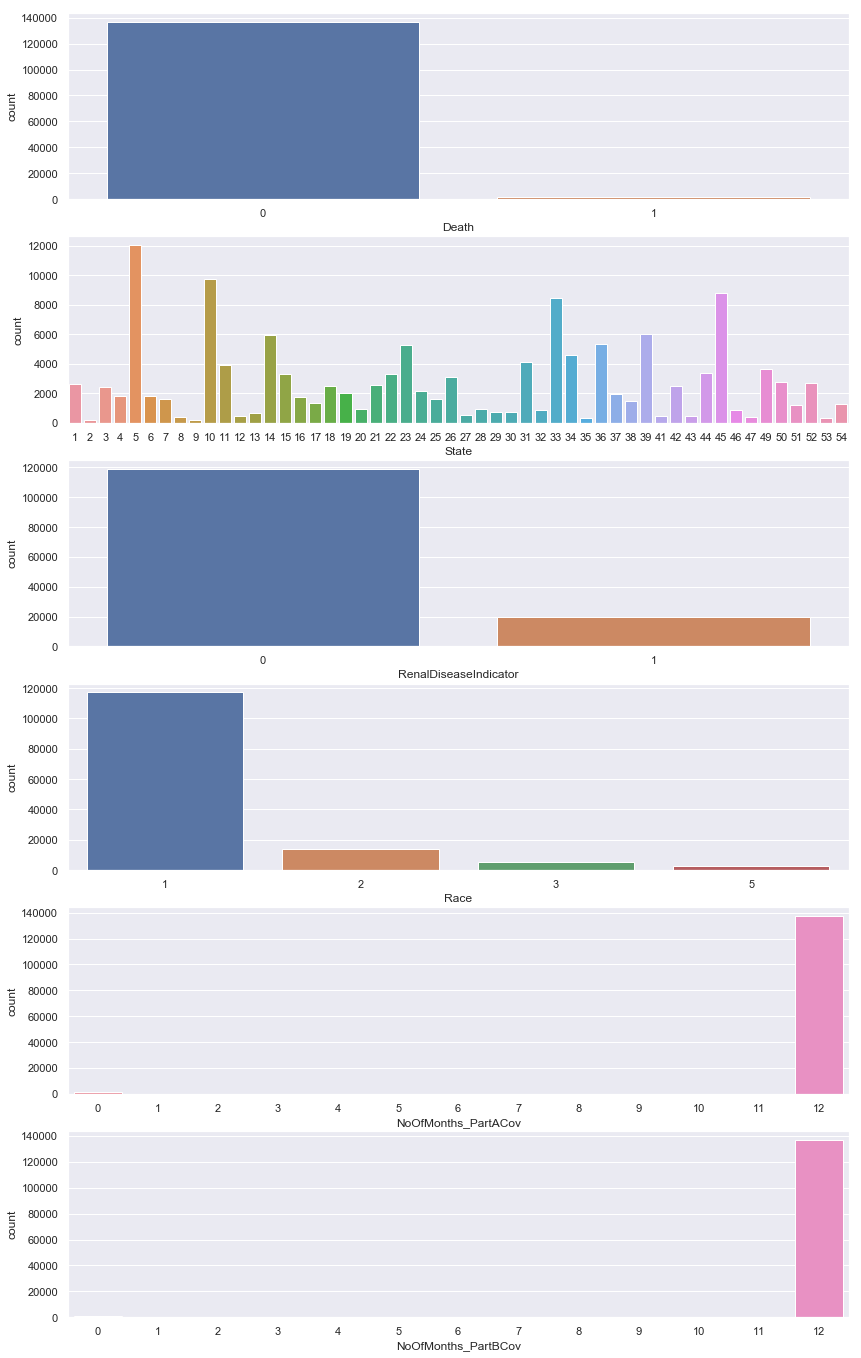

In [488]:
def countplot_loop(cols, df): 
    nums = list(range(len(cols)))
    tuples = list(zip(cols, nums))
    
    sns.set()
    fig, ax_ = plt.subplots(len(cols), 1, figsize=(14, 4*len(cols)))

    for col, i in tuples:
            graph_name = words[i]
            graph_name = sns.countplot(df[col], ax=ax_[i])
    plt.show()
    
cols = ['Death', 'State', 'RenalDiseaseIndicator', 'Race', 'NoOfMonths_PartACov', 
        'NoOfMonths_PartBCov']

countplot_loop(cols, train_bene_data)

Text(0.5, 1.0, 'Counts per County')

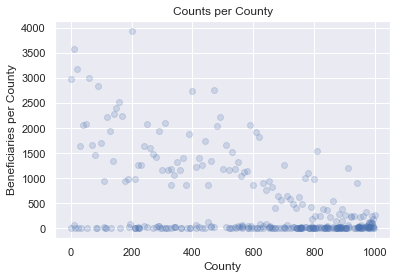

In [265]:
graph_county = train_bene_data[['County', 'BeneID']].groupby(['County']).size()
x = graph_county.index
y = graph_county.values
plt.scatter(x, y, alpha=.2)
plt.xlabel('County')
plt.ylabel('Beneficiaries per County')
plt.title('Counts per County')

In [489]:
table_A = train_bene_data[['NoOfMonths_PartACov', 'BeneID']].groupby('NoOfMonths_PartACov').size()
table_A_df = pd.DataFrame({'Months_PartA_Cvrg':table_A.index, 'Count':table_A.values})
table_A_df

,Months_PartA_Cvrg,Count
0,0,1000
1,1,3
2,2,5
3,3,5
4,4,13
5,5,8
6,6,38
7,7,16
8,8,26
9,9,7


In [490]:
table_B = train_bene_data[['NoOfMonths_PartBCov', 'BeneID']].groupby('NoOfMonths_PartBCov').size()
table_B_df = pd.DataFrame({'Months_PartB_Cvrg':table_B.index, 'Count':table_B.values})
table_B_df

,Months_PartB_Cvrg,Count
0,0,675
1,1,17
2,2,19
3,3,27
4,4,35
5,5,50
6,6,282
7,7,63
8,8,71
9,9,122


,Condition,Percent_w_condition
10,stroke,7.905829
3,Cancer,11.995872
4,ObstrPulmonary,23.715321
9,rheumatoidarthritis,25.682035
8,Osteoporasis,27.468316
2,KidneyDisease,31.235746
0,Alzheimer,33.218338
5,Depression,35.552412
1,Heartfailure,49.367765
6,Diabetes,60.185773


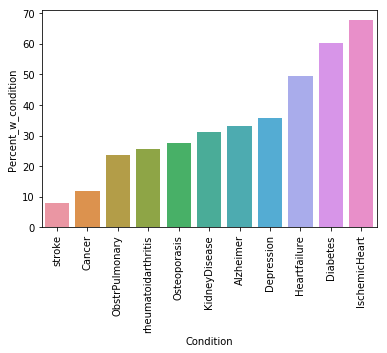

In [40]:
chronic_cond_list = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']

percentages = []
labels = []
for cond in chronic_cond_list:
    percentages.append(np.mean(train_bene_data[cond]*100))
    labels.append(cond[12:])
    
chronic_perc = pd.DataFrame({'Condition': labels, 'Percent_w_condition': percentages})
chronic_perc = chronic_perc.sort_values(by=["Percent_w_condition"])

g = sns.barplot(chronic_perc['Condition'], chronic_perc['Percent_w_condition'])
g.tick_params(axis= 'x', labelsize=10, rotation=90)
chronic_perc

## Outpatient data facets:

In [276]:
train_outp_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [231]:
train_outp_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,11002,624349,2009-10-11,2009-10-11,56011,30,326117.0,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,11003,189947,2009-02-12,2009-02-12,57610,80,362868.0,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,11003,438021,2009-06-27,2009-06-27,57595,10,328821.0,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,11004,121801,2009-01-06,2009-01-06,56011,40,334319.0,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,11004,150998,2009-01-22,2009-01-22,56011,200,403831.0,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


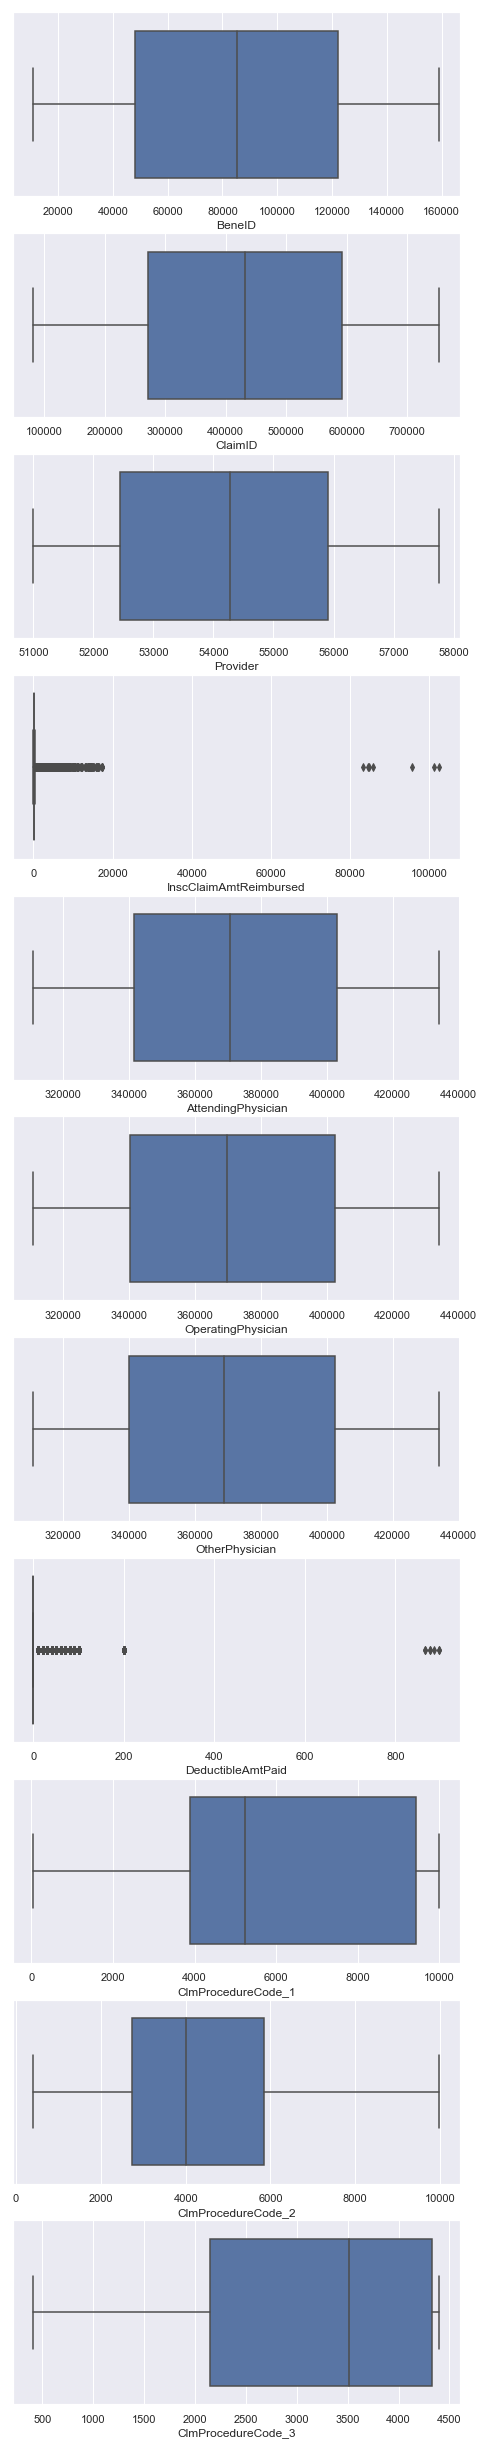

In [353]:
# looping boxplots
proc_cols = ['ClmProcedureCode_1','ClmProcedureCode_2', 'ClmProcedureCode_3']
for col in proc_cols:
    train_outp_data[col]=train_outp_data[col].astype('float')

cols = ['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'DeductibleAmtPaid', 'ClmProcedureCode_1','ClmProcedureCode_2', 'ClmProcedureCode_3']

boxplot_loop(cols, train_outp_data)

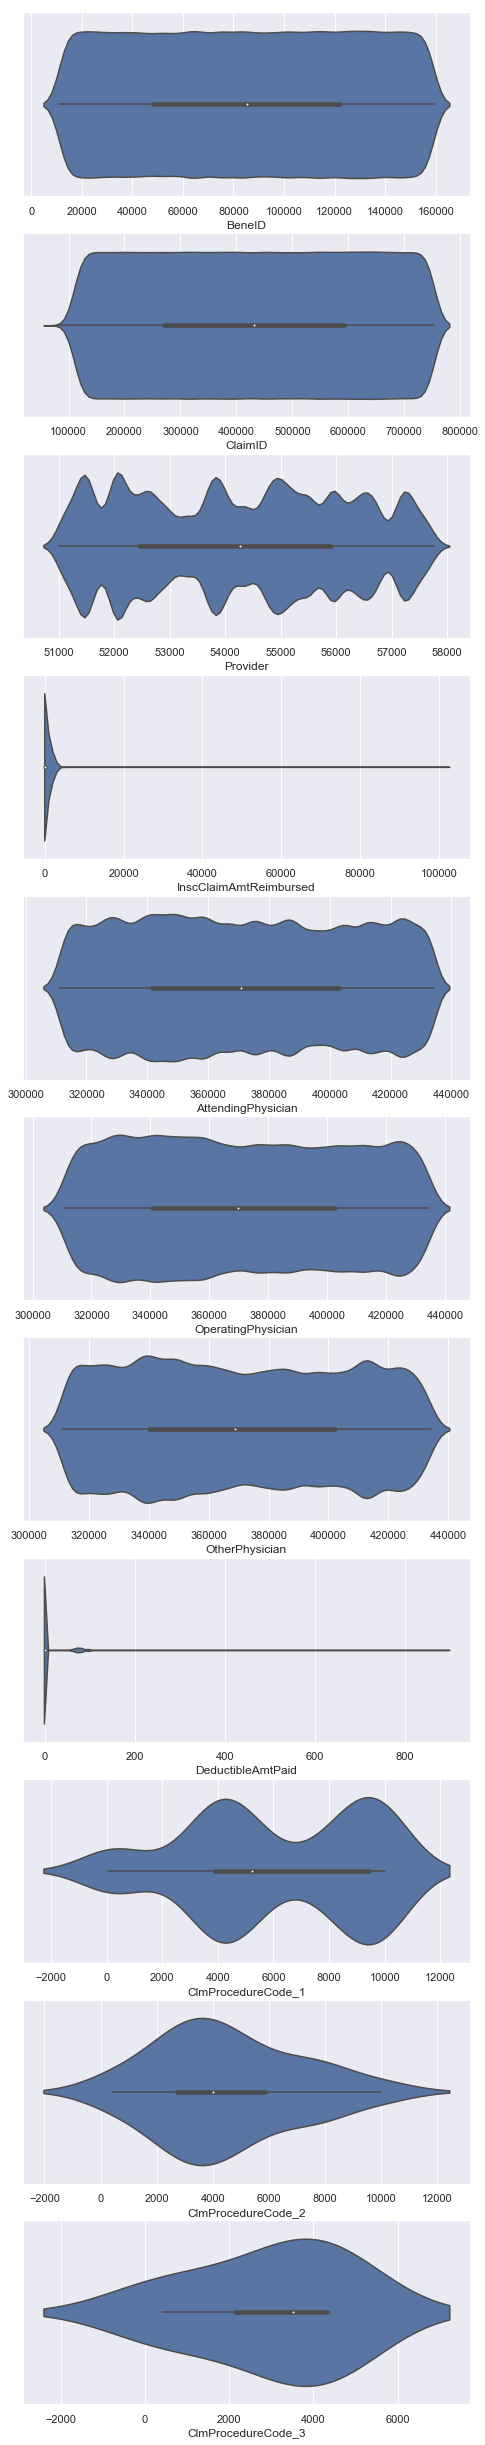

In [354]:
violinplot_loop(cols, train_outp_data)

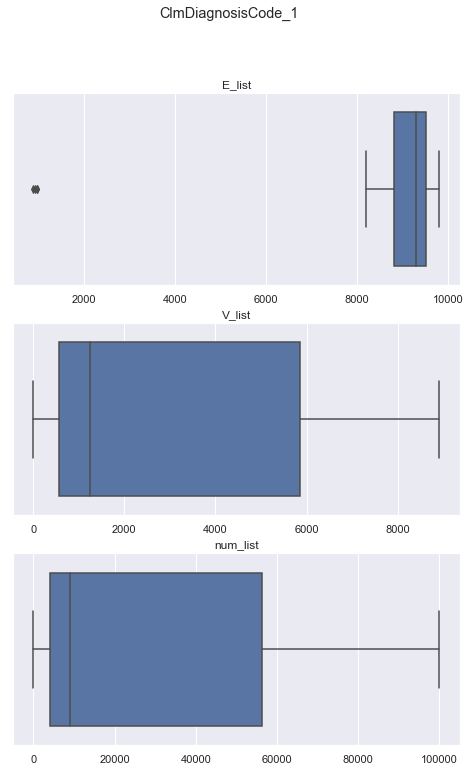

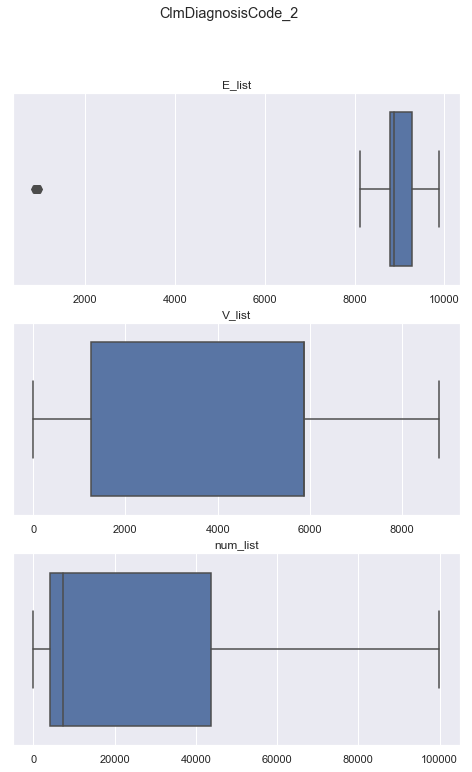

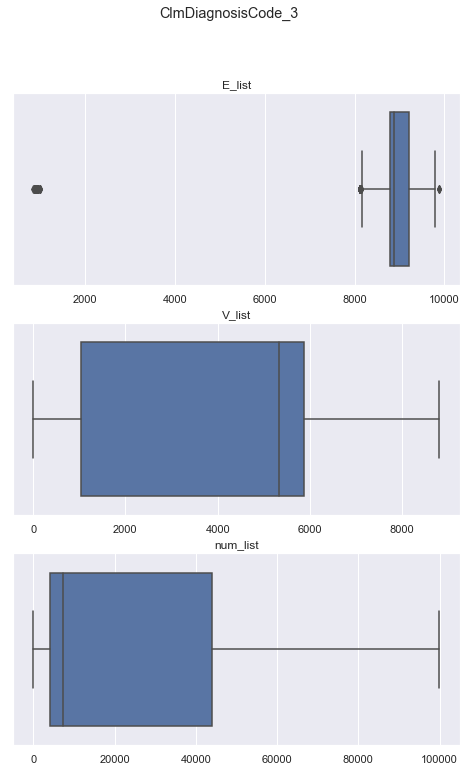

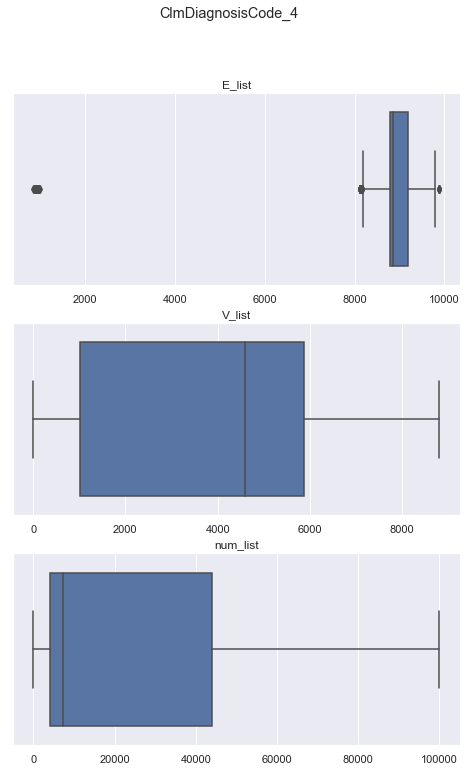

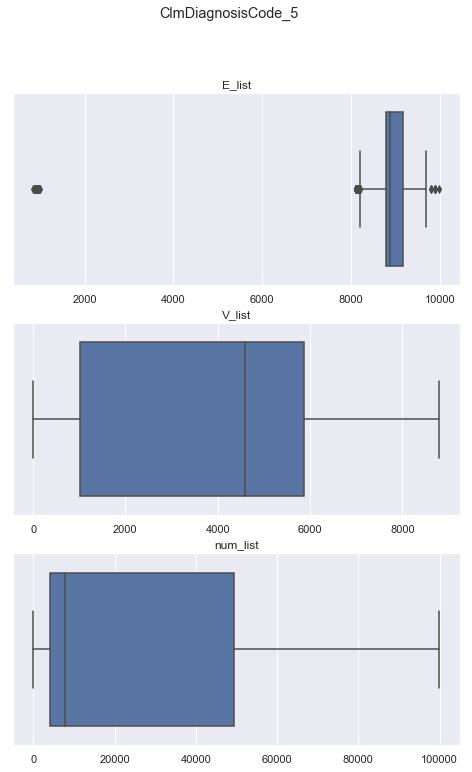

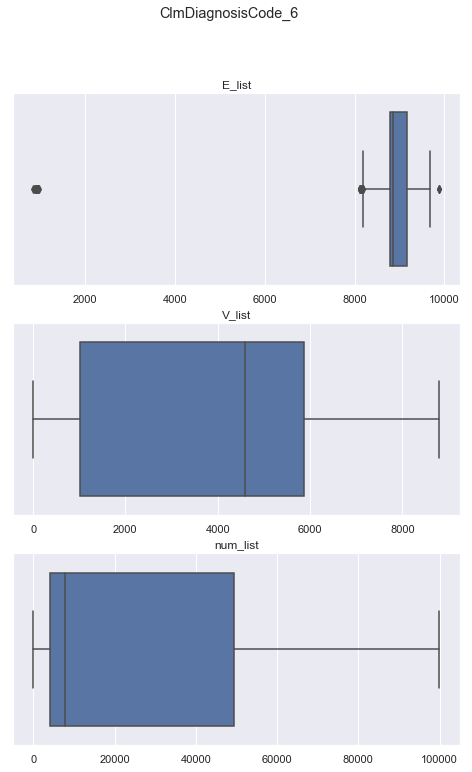

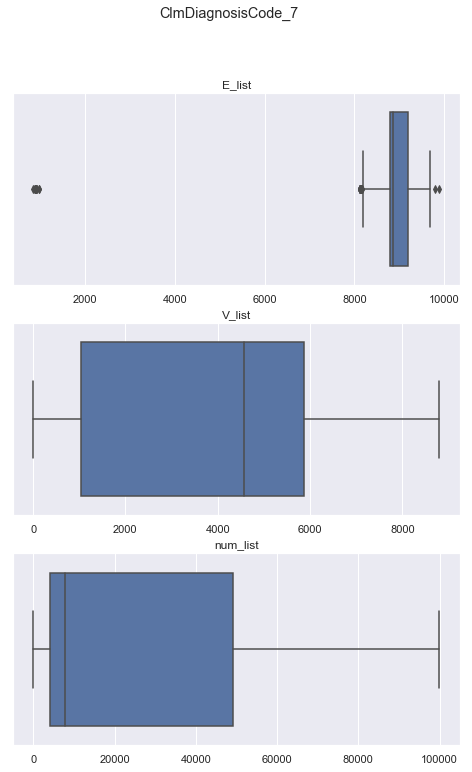

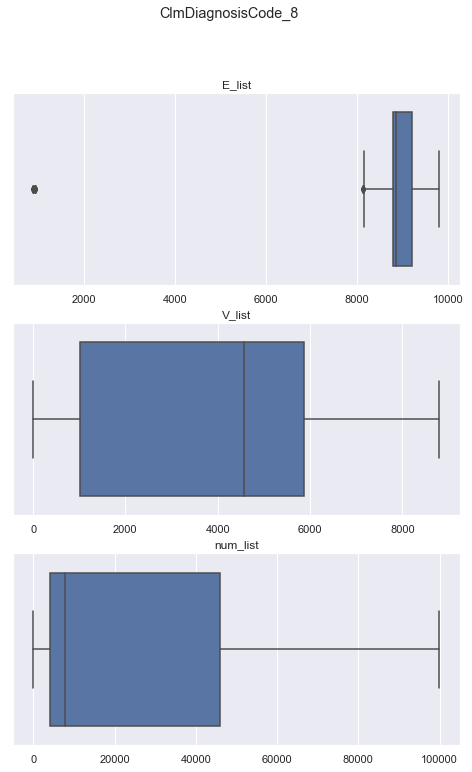

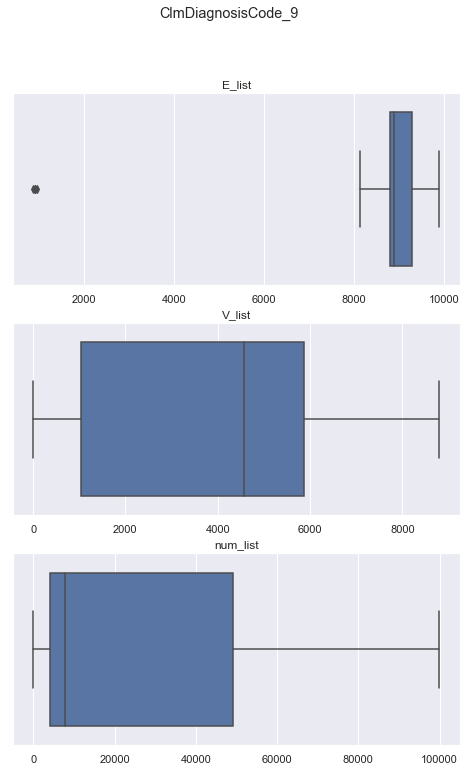

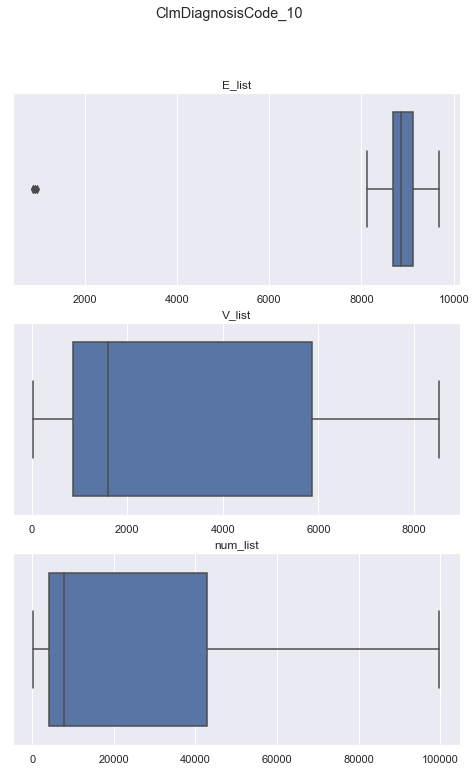

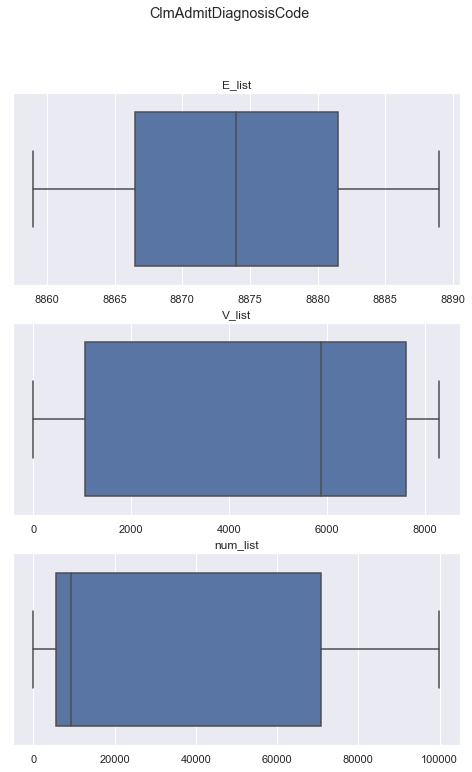

In [505]:
# Checking for outliers
# Looking for numbers that are outside of the typical range, once preceeding letters are removed.
# some observations begin with E n V 
# make list for each

def str_boxplots(num, df, codes, codes_dict):
    for col in codes:
        df[col] = df[col].astype('str')
    
    E_list = []
    n_list = []
    V_list = []
    num_list = []

    _series = df[codes_dict[num]]
    _series = _series[_series != 'nan']
    for entry in _series:
        if entry.startswith('E'):
            entry = entry[1:]
            E_list.append(entry)
        elif entry.startswith('V'):
            entry = entry[1:]
            V_list.append(entry)
        else:
            num_list.append(entry)

    E_list = pd.Series(E_list, dtype='float')
    V_list = pd.Series(V_list, dtype='float')
    num_list = pd.Series(num_list, dtype='float')

    begins_list = [E_list, V_list, num_list]
    nums = list(range(len(begins_list)))
    tuples = list(zip(begins_list, nums))     

    dict = {0:'E_list', 1:'V_list', 2:'num_list'}

    sns.set()
    fig, ax_ = plt.subplots(len(begins_list), 1, figsize=(8, 4*len(begins_list)))
    plt.suptitle(codes_dict[num])    
    for _list, i in tuples:
        graph_name = words[i]
        graph_name = sns.boxplot(_list, ax=ax_[i])
        ax_[i].set_title(dict[i])
    plt.show()

codes = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmAdmitDiagnosisCode']

codes_dict = {1:'ClmDiagnosisCode_1', 2:'ClmDiagnosisCode_2',
       3:'ClmDiagnosisCode_3', 4:'ClmDiagnosisCode_4', 5:'ClmDiagnosisCode_5',
       6:'ClmDiagnosisCode_6', 7:'ClmDiagnosisCode_7', 8:'ClmDiagnosisCode_8',
       9:'ClmDiagnosisCode_9', 10:'ClmDiagnosisCode_10', 11:'ClmAdmitDiagnosisCode'}

for i in range(1, 12):
    str_boxplots(i, train_outp_data, codes, codes_dict)

## Inpatient data facets:

In [413]:
train_inp_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'Duration'],
      dtype='object')

In [414]:
train_inp_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,Duration
0,11001,46614,2009-04-12,2009-04-18,55912,26000,390922.0,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,6
1,11001,66048,2009-08-31,2009-09-02,55907,5000,318495.0,318495.0,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,2
2,11001,68358,2009-09-17,2009-09-20,56046,5000,372395.0,NaN,324689.0,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,11011,38412,2009-02-14,2009-02-22,52405,5000,369659.0,392961.0,349768.0,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,8
4,11014,63689,2009-08-13,2009-08-30,56614,10000,379376.0,398258.0,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,17


In [492]:
train_inp_data.dtypes

BeneID                             int64
ClaimID                            int64
ClaimStartDt              datetime64[ns]
ClaimEndDt                datetime64[ns]
Provider                           int64
InscClaimAmtReimbursed             int64
AttendingPhysician               float64
OperatingPhysician               float64
OtherPhysician                   float64
AdmissionDt               datetime64[ns]
ClmAdmitDiagnosisCode             object
DeductibleAmtPaid                float64
DischargeDt               datetime64[ns]
DiagnosisGroupCode                object
ClmDiagnosisCode_1                object
ClmDiagnosisCode_2                object
ClmDiagnosisCode_3                object
ClmDiagnosisCode_4                object
ClmDiagnosisCode_5                object
ClmDiagnosisCode_6                object
ClmDiagnosisCode_7                object
ClmDiagnosisCode_8                object
ClmDiagnosisCode_9                object
ClmDiagnosisCode_10               object
ClmProcedureCode

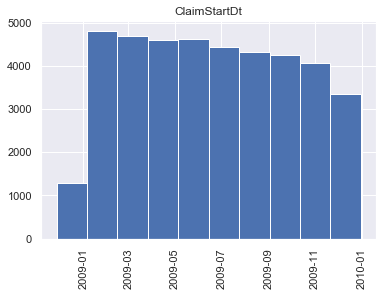

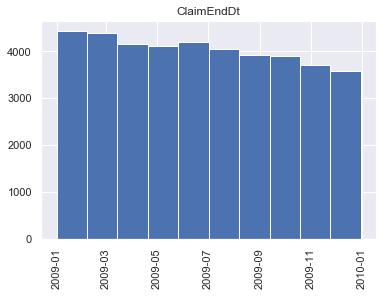

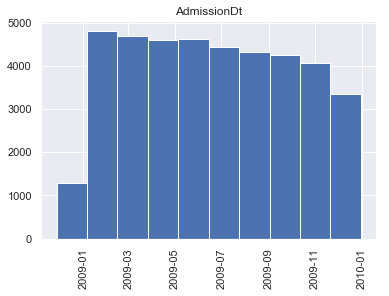

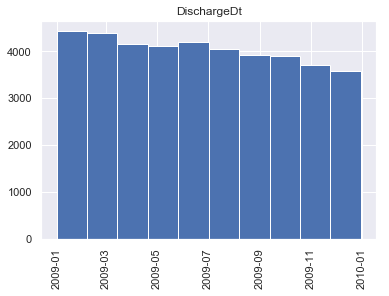

In [495]:
cols = ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt']

for col in cols:
    datetime_hist(train_inp_data, col)

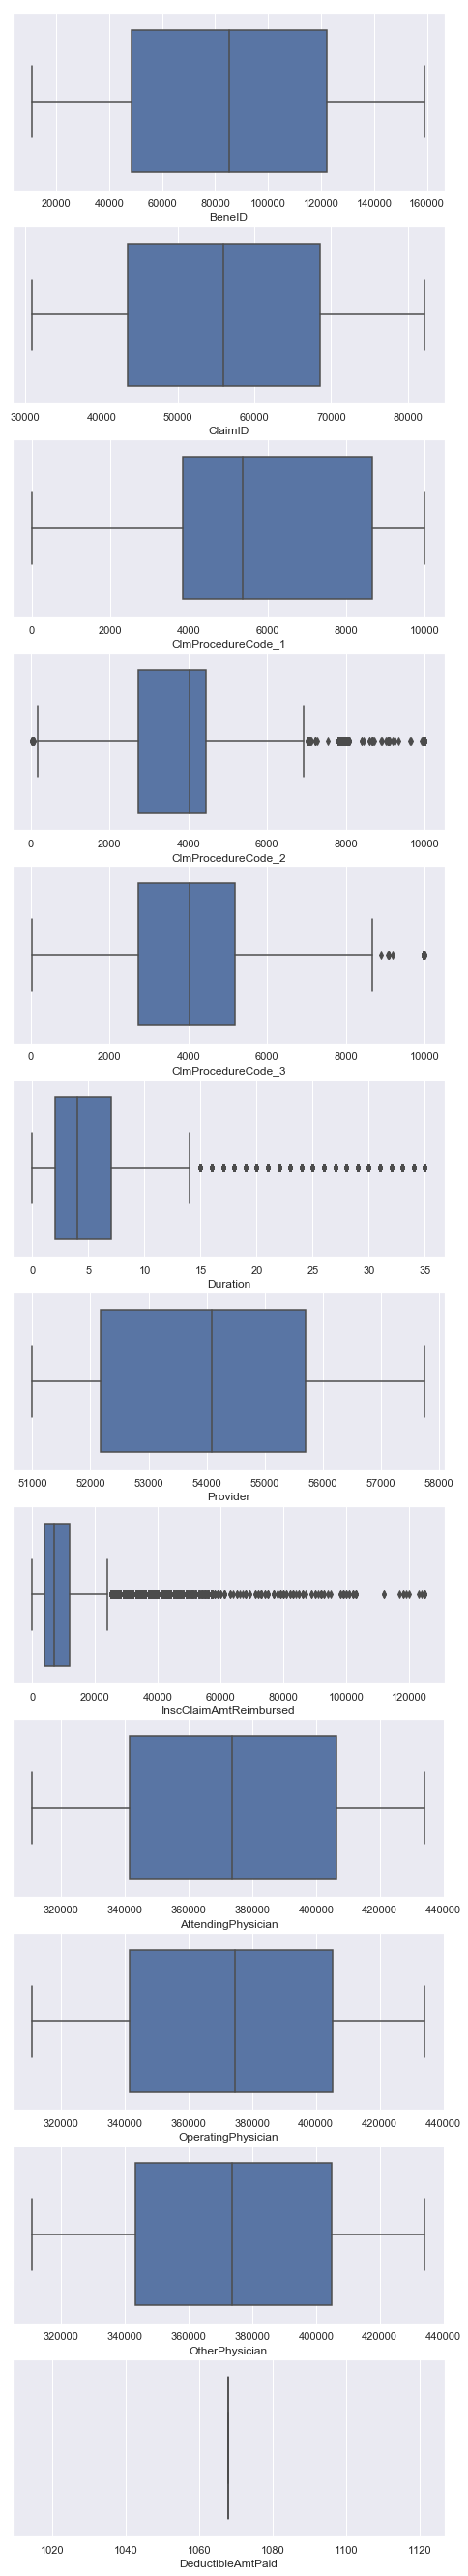

In [498]:
cols = ['BeneID', 'ClaimID', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'Duration', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'DeductibleAmtPaid']

boxplot_loop(cols, train_inp_data)

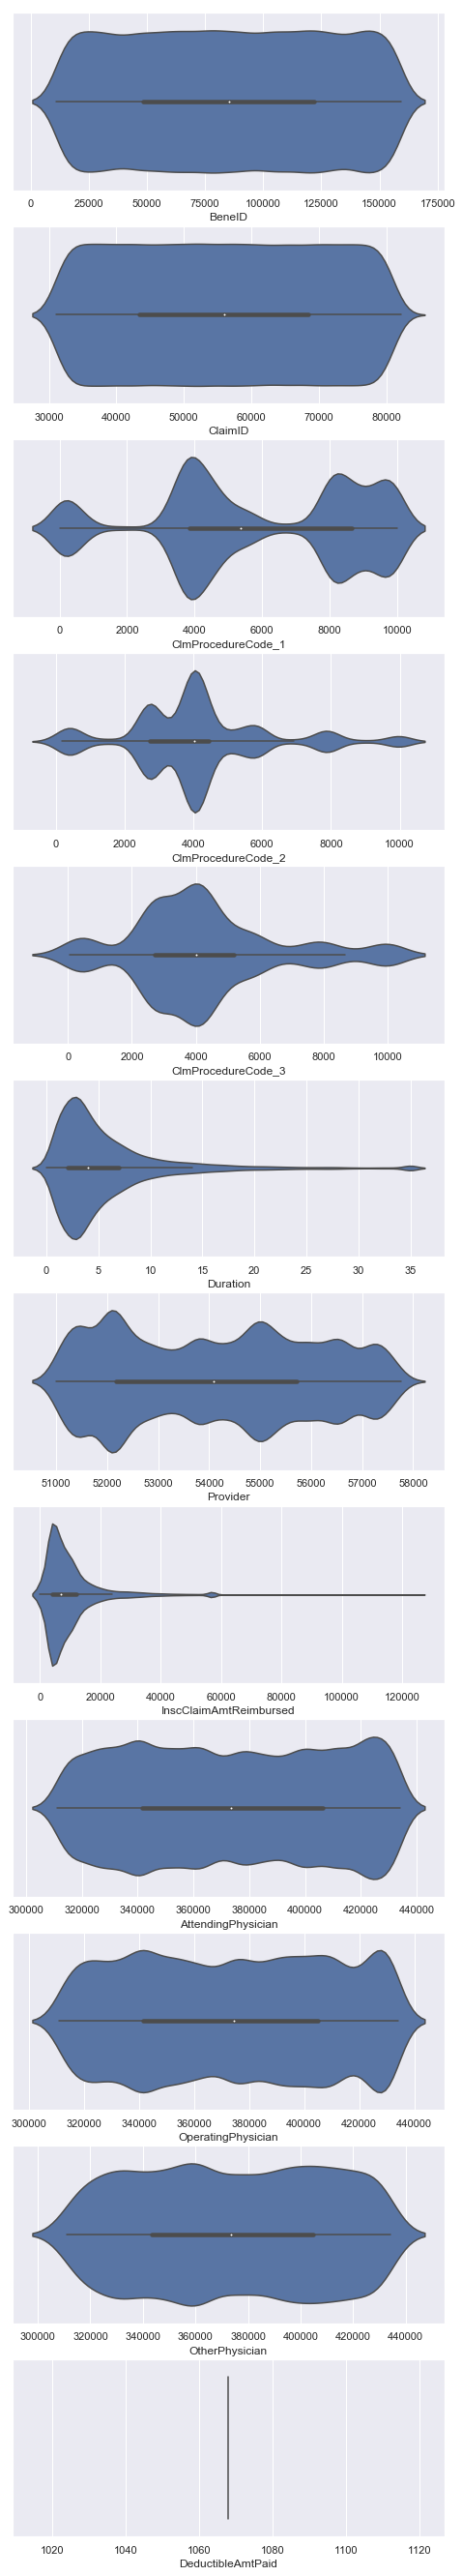

In [499]:
violinplot_loop(cols, train_inp_data)

In [653]:
train_inp_data['DeductibleAmtPaid'].value_counts()

1068.0    39575
Name: DeductibleAmtPaid, dtype: int64

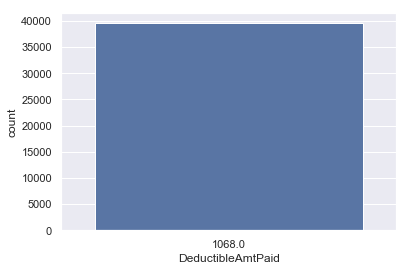

In [531]:
sns.countplot(train_inp_data['DeductibleAmtPaid'])

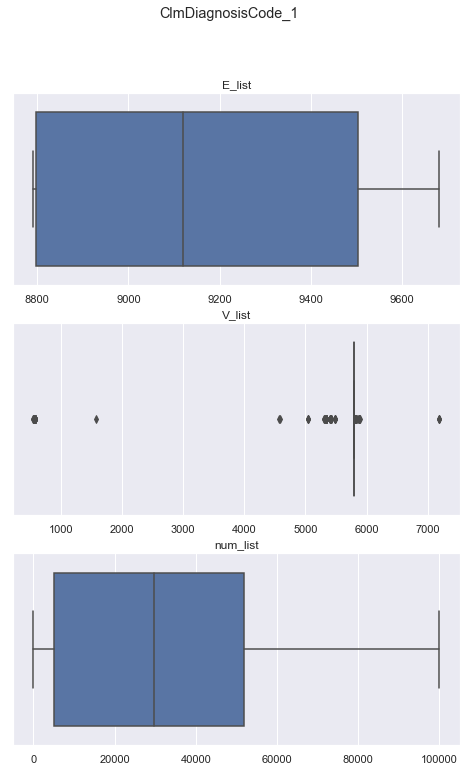

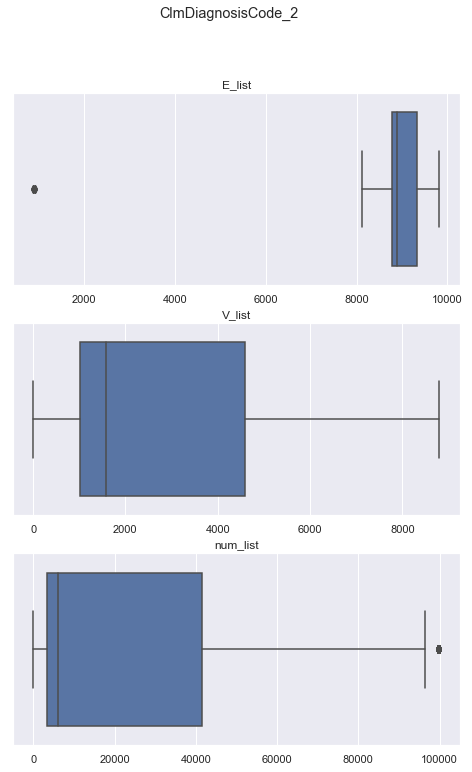

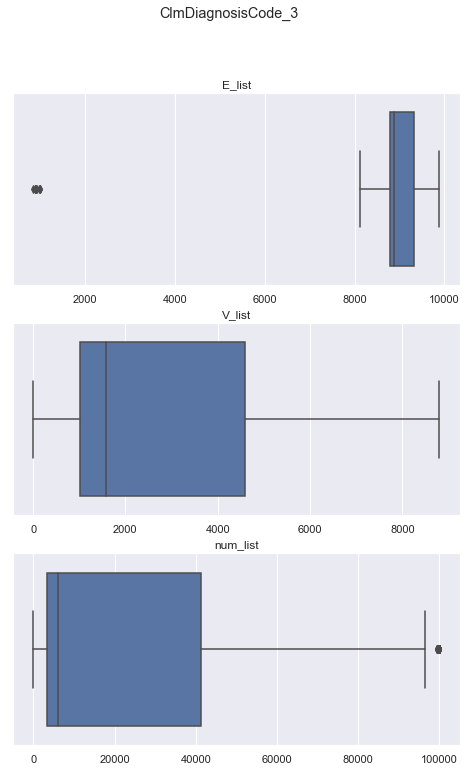

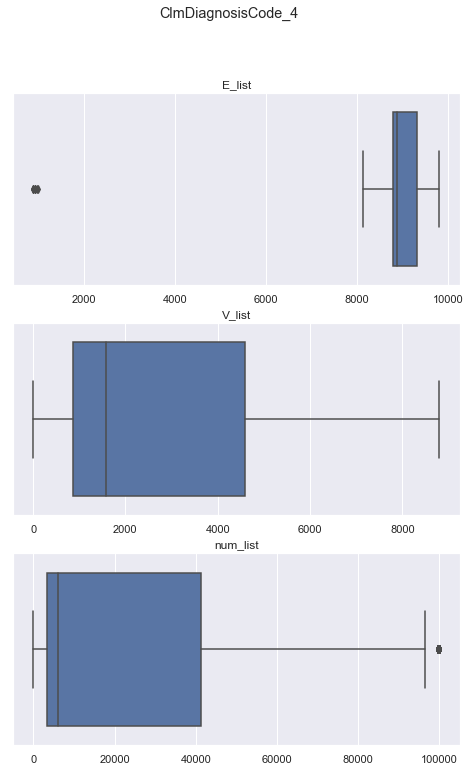

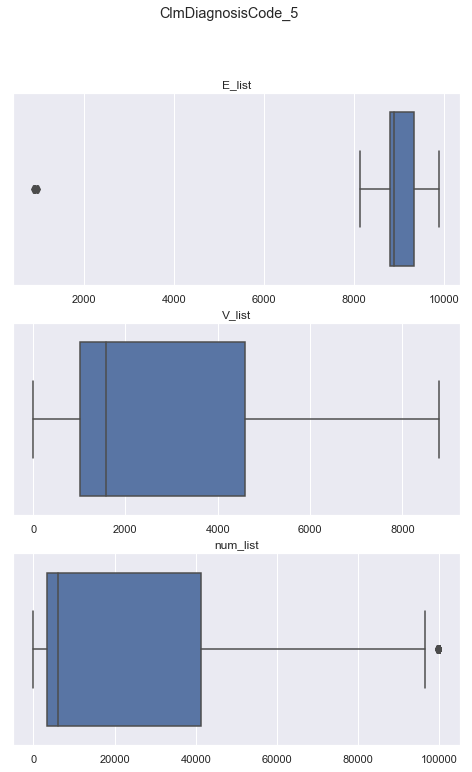

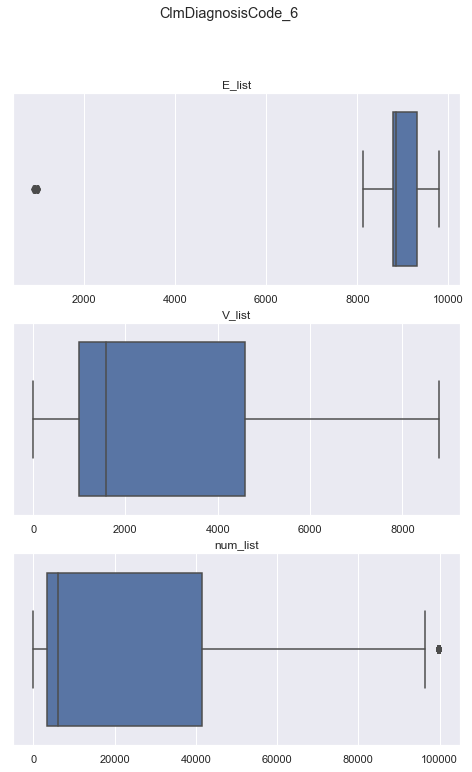

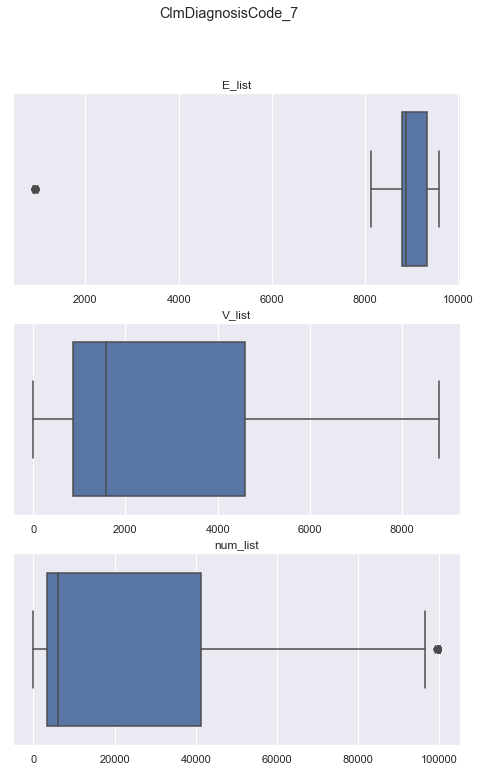

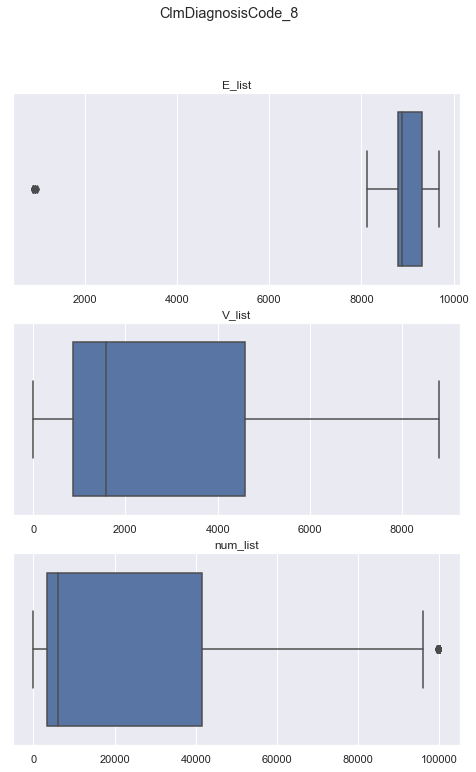

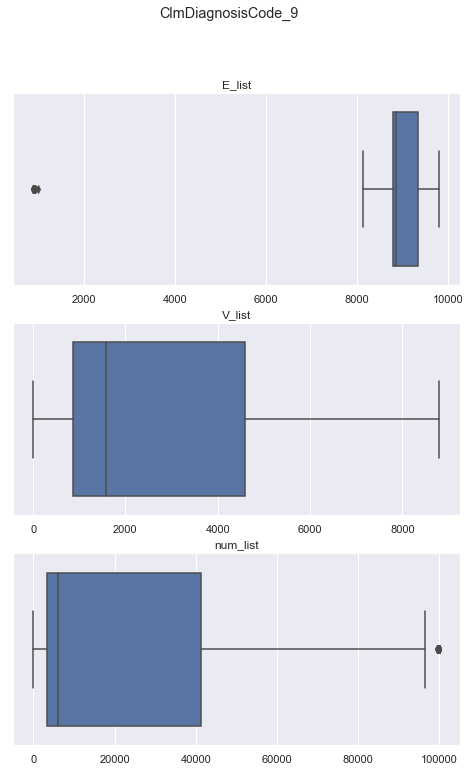

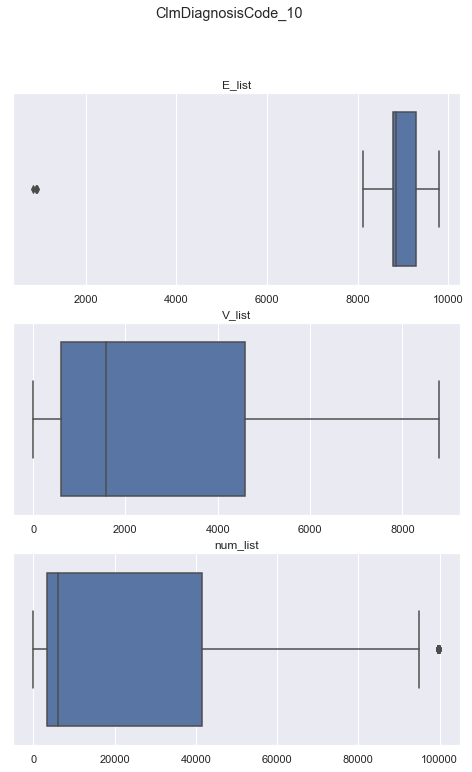

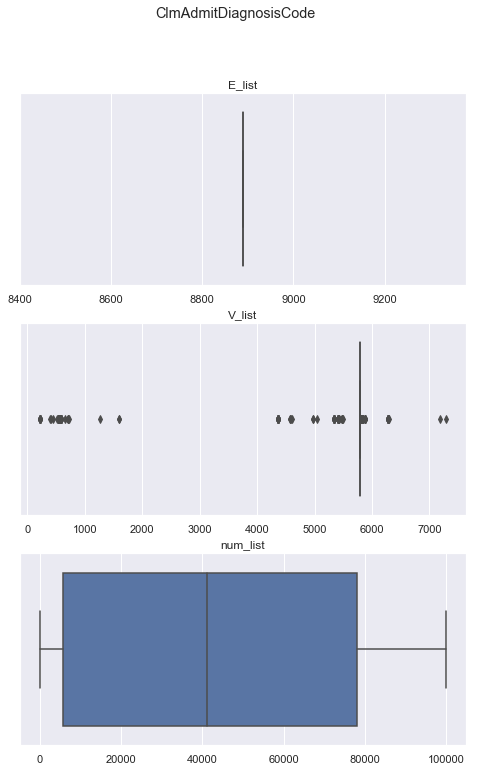

In [514]:
codes = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmAdmitDiagnosisCode', 
        'DiagnosisGroupCode']

codes_dict = {1:'ClmDiagnosisCode_1', 2:'ClmDiagnosisCode_2',
       3:'ClmDiagnosisCode_3', 4:'ClmDiagnosisCode_4', 5:'ClmDiagnosisCode_5',
       6:'ClmDiagnosisCode_6', 7:'ClmDiagnosisCode_7', 8:'ClmDiagnosisCode_8',
       9:'ClmDiagnosisCode_9', 10:'ClmDiagnosisCode_10', 11:'ClmAdmitDiagnosisCode', 
       12: 'DiagnosisGroupCode'}

for i in range(1, 12):
    str_boxplots(i, train_inp_data, codes, codes_dict)

Number of observations labeled OTH: 113


Text(0.5, 1.0, 'Distribution of Numeric Diagnosis Group Codes')

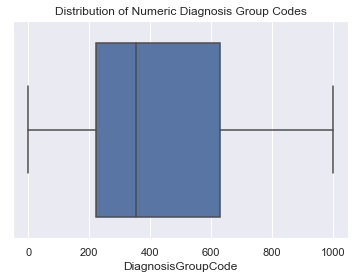

In [530]:
print("Number of observations labeled OTH:", len(train_inp_data['DiagnosisGroupCode'][train_inp_data['DiagnosisGroupCode'].str.startswith('OTH')]))
gdf = train_inp_data['DiagnosisGroupCode'][(train_inp_data['DiagnosisGroupCode'].str.isnumeric())]
gdf = gdf.astype('int64')
g = sns.boxplot(gdf)
g.set_title('Distribution of Numeric Diagnosis Group Codes')

# Claims-level fraud
#### We will look for trends with fraudulent providers and their claims.

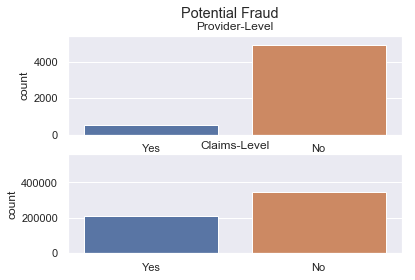

In [534]:
sns.set()

fig, ax = plt.subplots(2, 1)
fig.suptitle('Potential Fraud')
            
zero = sns.countplot(train_provider_data.PotentialFraud.values, order = ["Yes", "No"], ax=ax[0])
ax[0].set_title("Provider-Level") 
zero.set_ylim(0, len(train_provider_data.PotentialFraud.values))

one = sns.countplot(train_all_data.PotentialFraud.values, ax=ax[1])
ax[1].set_title("Claims-Level") 
one.set_ylim(0, len(train_all_data.PotentialFraud.values))
plt.show()

In [38]:
train_provider_data.PotentialFraud.value_counts()

No     4904
Yes     506
Name: PotentialFraud, dtype: int64

In [537]:
train_all_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,Duration,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Death,Age,PotentialFraud
0,11002,624349,2009-10-11,2009-10-11,56011,30,326117.0,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,NaT,NaT,NaN,NaN,1936-09-01,NaN,1,1,0,39,280,12,12,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,30,50,0,73.0,Yes
1,11004,121801,2009-01-06,2009-01-06,56011,40,334319.0,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN,1922-07-01,NaN,0,1,0,39,270,12,12,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,1810,760,0,87.0,Yes
2,11004,150998,2009-01-22,2009-01-22,56011,200,403831.0,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947,NaT,NaT,NaN,NaN,1922-07-01,NaN,0,1,0,39,270,12,12,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,1810,760,0,87.0,Yes
3,11004,173224,2009-02-03,2009-02-03,56011,20,339887.0,NaN,NaN,20381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN,1922-07-01,NaN,0,1,0,39,270,12,12,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,1810,760,0,87.0,Yes
4,11004,224741,2009-03-03,2009-03-03,56011,40,345721.0,NaN,NaN,V6546,4280,2449,V854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN,1922-07-01,NaN,0,1,0,39,270,12,12,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,1810,760,0,87.0,Yes


In [538]:
train_fraud = train_all_data[(train_all_data['PotentialFraud'] == 'Yes')]
train_no_fraud = train_all_data[(train_all_data['PotentialFraud'] == 'No')]

In [ ]:
#Diagnosis and Procedure codes range from  1 - 9999
- ClmDiagnosisCodes, ClmAdmitDiagnosisCode, DiagnosisGroupCode share the same values
- ClmProcedureCodes share the same values 

In [649]:
# diagnosis codes and procedure codes are different 

diag_codes = ['ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10']
diag_vals = []
for col in diag_codes:
    diag_vals.append(list(train_all_data[col][(train_all_data[col].notnull())].values))
    
proc_codes = ['ClmProcedureCode_1', 'ClmProcedureCode_2','ClmProcedureCode_3']
proc_vals = []
for col in proc_codes:
    proc_vals.append(list(train_all_data[col][(train_all_data[col].notnull())].values))

proc_set = set(sum(proc_vals, []))
diag_set = set(sum(diag_vals, []))

proc_set.intersection(diag_set)

set()

In [35]:
train_final_data = pd.read_csv('/Users/Julia/Documents/bootcamp/fraud_capstone/data_out/train_final_data.csv', low_memory=False)   

In [36]:
train_final_data.head()

,ChronicCond_Alzheimer,ChronicCond_Cancer,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_Heartfailure,ChronicCond_IschemicHeart,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,County_0,County_1,County_10,County_100,County_11,County_110,County_111,County_113,County_117,County_120,County_130,County_131,County_14,County_140,County_141,County_150,County_160,County_161,County_170,County_180,County_190,County_191,County_194,County_20,County_200,County_210,County_211,County_212,County_213,County_220,County_221,County_222,County_223,County_224,County_230,County_240,County_241,County_25,County_250,County_251,County_260,County_270,County_271,County_280,County_281,County_288,County_290,County_291,County_292,County_30,County_300,County_301,County_310,County_311,County_312,County_320,County_321,County_328,County_330,County_331,County_34,County_340,County_341,County_342,County_343,County_350,County_360,County_361,County_362,County_370,County_380,County_381,County_390,County_391,County_392,County_40,County_400,County_410,County_411,County_412,County_420,County_421,County_430,County_431,County_440,County_441,County_450,County_451,County_460,County_461,County_462,County_470,County_471,County_480,County_490,County_50,County_500,County_510,County_511,County_520,County_521,County_522,County_530,County_531,County_540,County_541,County_542,County_55,County_550,County_551,County_552,County_560,County_561,County_562,County_563,County_564,County_570,County_580,County_581,County_582,County_583,County_590,County_591,County_592,County_60,County_600,County_601,County_610,County_611,County_612,County_620,County_621,County_622,County_630,County_631,County_632,County_640,County_641,County_650,County_651,County_652,County_653,County_654,County_660,County_661,County_662,County_670,County_671,County_672,County_680,County_681,County_690,County_691,County_70,County_700,County_701,County_702,County_703,County_710,County_711,County_712,County_720,County_722,County_730,County_731,County_734,County_740,County_741,County_742,County_743,County_744,County_750,County_751,County_752,County_753,County_754,County_755,County_756,County_757,County_758,County_760,County_761,County_770,County_771,County_772,County_780,County_782,County_783,County_784,County_785,County_790,County_791,County_792,County_793,County_794,County_795,County_796,County_797,County_80,County_800,County_801,County_802,County_803,County_804,County_810,County_811,County_812,County_820,County_821,County_822,County_830,County_831,County_832,County_834,County_835,County_838,County_84,County_840,County_841,County_842,County_843,County_844,County_845,County_850,County_851,County_860,County_861,County_862,County_867,County_870,County_871,County_873,County_874,County_875,County_876,County_878,County_879,County_88,County_880,...,proc_864.0,proc_8659.0,proc_8666.0,proc_8667.0,proc_8669.0,proc_8670.0,proc_8674.0,proc_8675.0,proc_8683.0,proc_8689.0,proc_8693.0,proc_8694.0,proc_8698.0,proc_8703.0,proc_8708.0,proc_8721.0,proc_8722.0,proc_8724.0,proc_8737.0,proc_8741.0,proc_8744.0,proc_8749.0,proc_8751.0,proc_8753.0,proc_8754.0,proc_8761.0,proc_8769.0,proc_8773.0,proc_8774.0,proc_8775.0,proc_8777.0,proc_8778.0,proc_8801.0,proc_881.0,proc_8814.0,proc_8819.0,proc_8823.0,proc_8826.0,proc_8827.0,proc_8828.0,proc_8829.0,proc_8837.0,proc_8838.0,proc_8841.0,proc_8842.0,proc_8843.0,proc_8844.0,proc_8845.0,proc_8847.0,proc_8848.0,proc_8849.0,proc_8853.0,proc_8855.0,proc_8856.0,proc_8857.0,proc_8866.0,proc_8867.0,proc_8871.0,proc_8872.0,proc_8873.0,proc_8874.0,proc_8875.0,proc_8876.0,proc_8877.0,proc_8879.0,proc_8881.0,proc_889.0,proc_8891.0,proc_8893.0,proc_8894.0,proc_8897.0,proc_8903.0,proc_8904.0,proc_8905.0,proc_8909.0,proc_8914.0,proc_8915.0,proc_8919.0,proc_8921.0,proc_8922.0,proc_8929.0,proc_8937.0,proc_8938.0,proc_8939.0,proc_8941.0,proc_8944.0,proc_8945.0,proc_8949.0,proc_8951.0,proc_8952.0,proc_8954.0,proc_8959.0,proc_8961.0,proc_89

# Inferential Statistics, aggregated data


In [ ]:
for i in train_final_data.columns:
    print

In [665]:
pd.crosstab(train_final_data.Race, train_final_data.PotentialFraud)

PotentialFraud,No,Yes
Race,,
1,4825,505
2,51,0
3,23,1
5,5,0


In [666]:
pd.crosstab(train_final_data.County, train_final_data.PotentialFraud)

PotentialFraud,No,Yes
County,,
0,121,15
1,1,0
10,146,18
20,117,16
25,2,0
30,46,3
40,80,4
50,73,9
60,144,18
